#Loan Approval

---
**Objective:**
predict the status of loan for individuals based the following information.</font>

## DataSet Description

- **Loan_ID:** data set unique ID <br>
- **Gender:** individual gender<br>
- **Married:** individual marital status<br>
- **Dependents:** number of dependents<br>
- **Education:** individual education status<br>
- **Self_Employed:** individual employment status<br>
- **ApplicantIncome:** individual income<br>
- **CoapplicantIncome:** individual Coapplicant income<br>
- **LoanAmount:** Loan amount in thousands<br>
- **Loan_Amount_Term:** term of loan in months<br>
- **Credit_History:** credit history meets guidelines<br>
- **Property_Area:** Urban/ Semi Urban/ Rural<br>
- **Loan_Status:** loan approved (Y/N)<br>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Combine the two dataset in order to apply the same preprocessing steps in both dataframes

In [38]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df=df_train.append(df_test)
df.head()

<ipython-input-38-7abf88700452>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_train.append(df_test)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [39]:
rows = df.shape[0]
columns = df.shape[1]

print('There are {} rows and {} columns.'.format(rows,columns))

There are 614 rows and 13 columns.


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 100
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [41]:
#Check the null (missing values)
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [42]:
df.duplicated().sum()

0

In [43]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


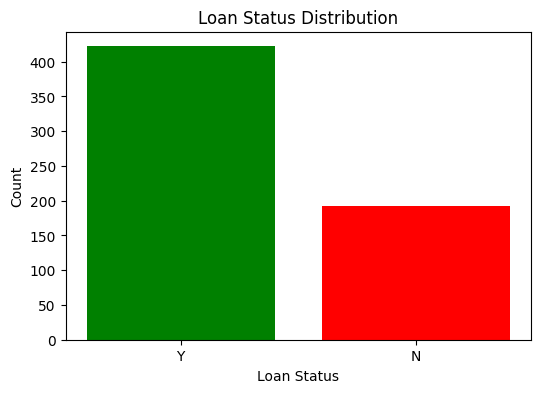

In [44]:
loan_status_counts = df['Loan_Status'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(loan_status_counts.index, loan_status_counts.values, color=['green', 'red'])
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

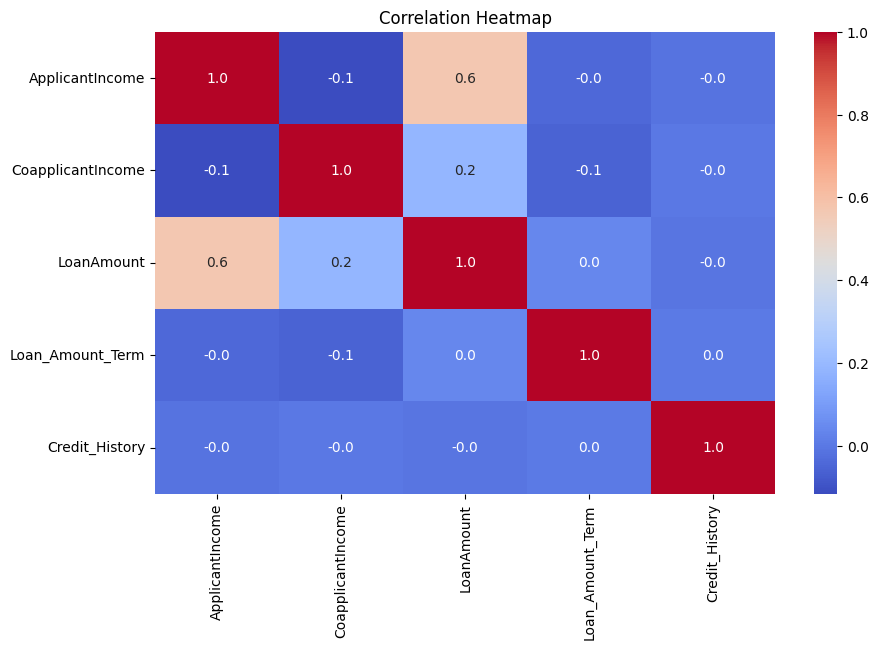

In [45]:
# -1 to +1
# Heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-46-972ad0c805d5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(removeNA_df['LoanAmount']);


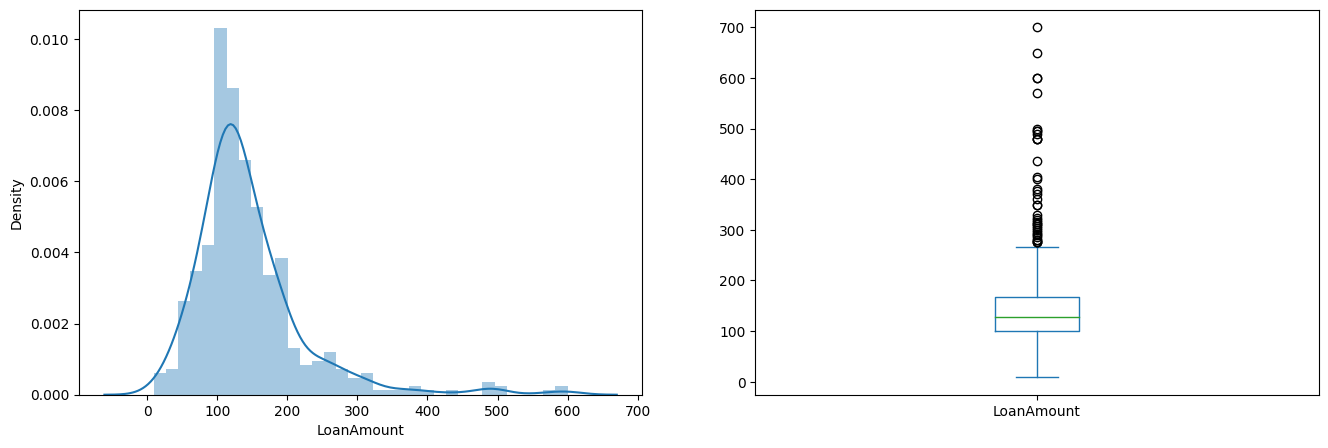

In [46]:
plt.figure(1)
plt.subplot(121)
removeNA_df=df.dropna() # we need to remove Na in order to plot a density graph
sns.distplot(removeNA_df['LoanAmount']);

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

Loan_Status         N         Y
Gender                         
Female       0.330357  0.669643
Male         0.306748  0.693252


<Axes: xlabel='Gender'>

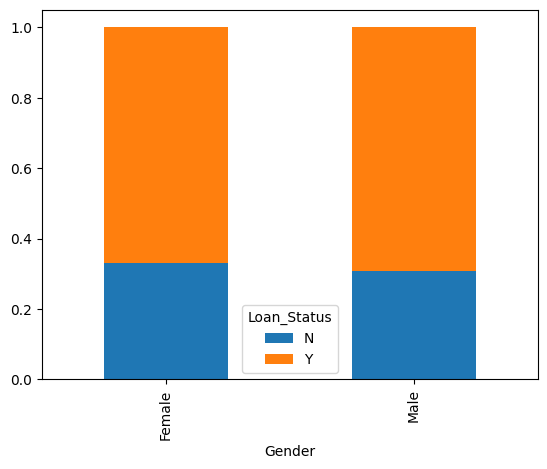

In [47]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status'],normalize='index')
print(Gender)
Gender.plot(kind='bar', stacked=True)

Loan_Status           N         Y
Self_Employed                    
No             0.314000  0.686000
Yes            0.317073  0.682927


<Axes: xlabel='Self_Employed'>

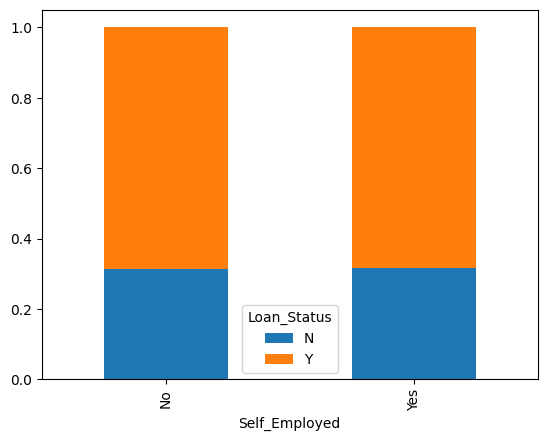

In [48]:
Gender=pd.crosstab(df['Self_Employed'],df['Loan_Status'],normalize='index')
print(Gender)
Gender.plot(kind='bar', stacked=True)


drop some columns we beleive they do not affect the loan approval.

In [49]:
df.drop(['Loan_ID','Gender','Self_Employed','ApplicantIncome','LoanAmount','Loan_Amount_Term'], inplace=True, axis=1)

In [50]:
df['Credit_History'] = df['Credit_History'].astype('O')

In [51]:
df['Credit_History'].unique()

array([1.0, 0.0, nan], dtype=object)

In [52]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

In [53]:
df.isnull().sum()

Married              0
Dependents           0
Education            0
CoapplicantIncome    0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [54]:
le = LabelEncoder()
cat_data=df[['Credit_History','Dependents','Education','Married','Property_Area','Loan_Status']]
num_data=df[['CoapplicantIncome']]
cat_data.head()

,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status
0,1.0,0,Graduate,No,Urban,Y
1,1.0,1,Graduate,Yes,Rural,N
2,1.0,0,Graduate,Yes,Urban,Y
3,1.0,0,Not Graduate,Yes,Urban,Y
4,1.0,0,Graduate,No,Urban,Y


In [55]:
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])
cat_data.head()

<ipython-input-55-699cec605dfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i] = le.fit_transform(cat_data[i])
<ipython-input-55-699cec605dfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i] = le.fit_transform(cat_data[i])
<ipython-input-55-699cec605dfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status
0,1,0,0,0,2,1
1,1,1,0,1,0,0
2,1,0,0,1,2,1
3,1,0,1,1,2,1
4,1,0,0,0,2,1


In [56]:
df = pd.concat([cat_data, num_data], axis=1)
df.head()

,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status,CoapplicantIncome
0,1,0,0,0,2,1,0.0
1,1,1,0,1,0,0,1508.0
2,1,0,0,1,2,1,0.0
3,1,0,1,1,2,1,2358.0
4,1,0,0,0,2,1,0.0


Normalize data ranges for all features (e.g., between 0 and 1)

In [57]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

numerical_columns = ["Credit_History","Dependents",	"Education","Married","Property_Area","CoapplicantIncome"]

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling to the selected columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

#normalized DataFrame
df.head()


,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status,CoapplicantIncome
0,1.0,0.000000,0.0,0.0,1.0,1,0.000000
1,1.0,0.333333,0.0,1.0,0.0,0,0.036192
2,1.0,0.000000,0.0,1.0,1.0,1,0.000000
3,1.0,0.000000,1.0,1.0,1.0,1,0.056592
4,1.0,0.000000,0.0,0.0,1.0,1,0.000000


In [58]:
df.describe() #after normalization

,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status,CoapplicantIncome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.855049,0.248100,0.218241,0.653094,0.518730,0.687296,0.038910
std,0.352339,0.336541,0.413389,0.476373,0.393741,0.463973,0.070229
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,0.500000,1.000000,0.028524
75%,1.000000,0.333333,0.000000,1.000000,1.000000,1.000000,0.055134
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We split the data between training and testing.
Then, we train a model to predict the loan status

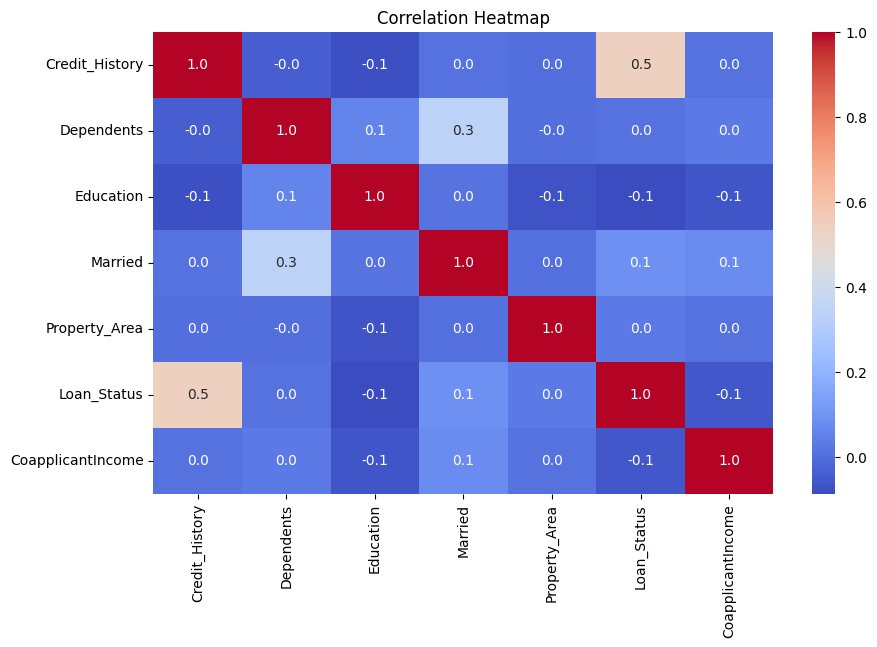

In [59]:
# -1 to +1
# Heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

In [60]:
input_variables = ['Credit_History','Dependents','Education','Married','Property_Area','CoapplicantIncome']
x = df[input_variables]
y = df['Loan_Status']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size =0.3)

In [61]:
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [62]:
pred_val = model.predict(x_val)
accuracy_score(y_val,pred_val)

0.827027027027027

In [63]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier()

In [64]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [65]:
pred_val = rfc.predict(x_val)
accuracy_score(y_val,pred_val)

0.7837837837837838

In [66]:
from sklearn.svm import SVC
sv = SVC()

In [67]:
sv.fit(x_train, y_train)

SVC()

In [68]:
pred_val = sv.predict(x_val)
accuracy_score(y_val,pred_val)

0.827027027027027